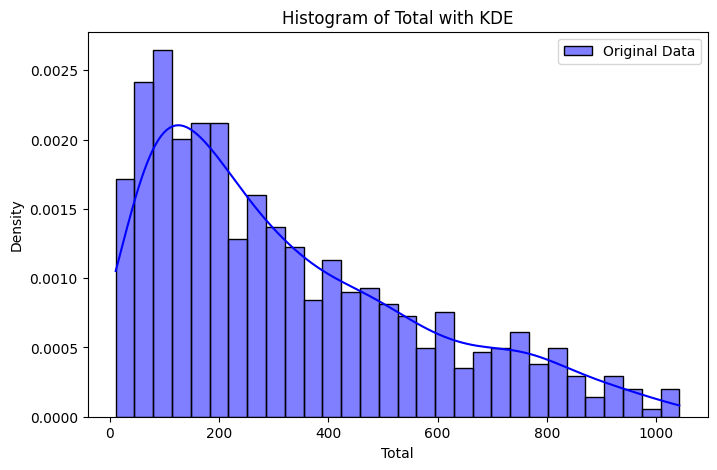

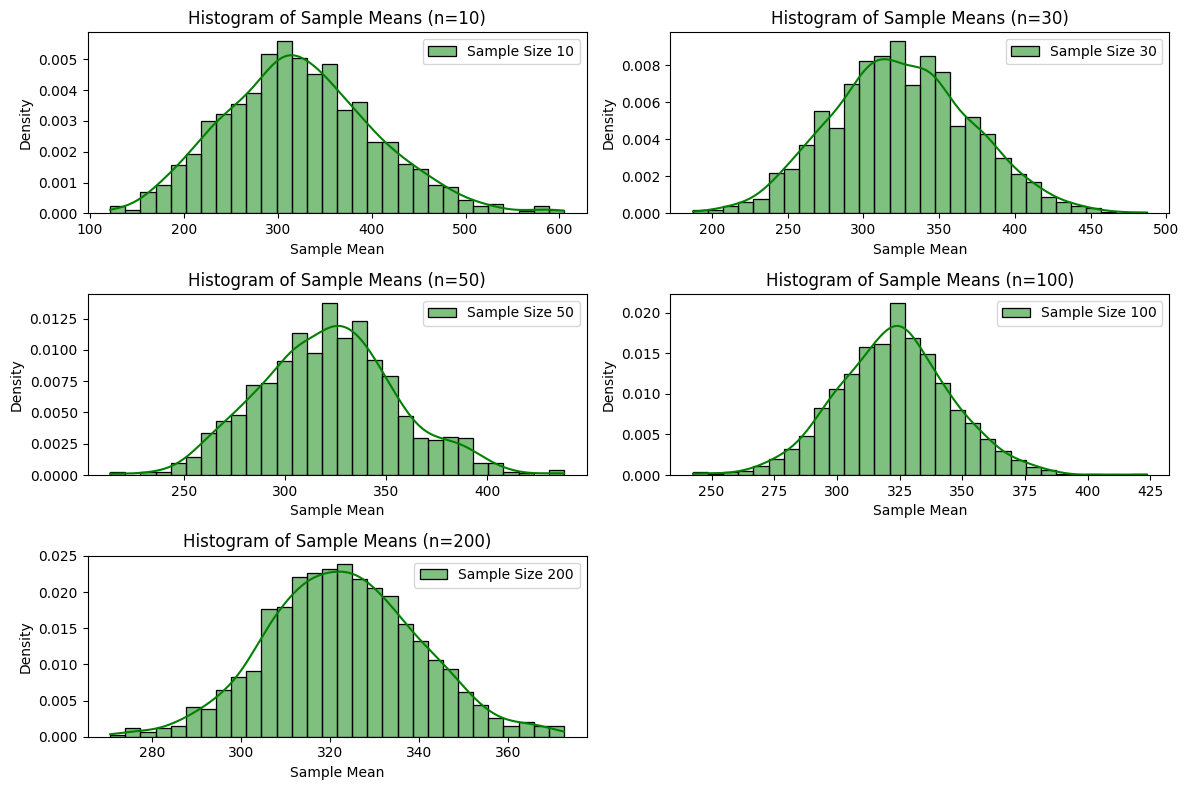

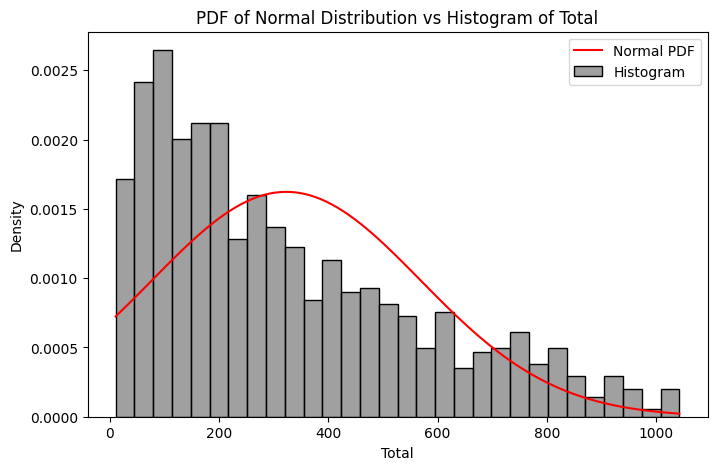

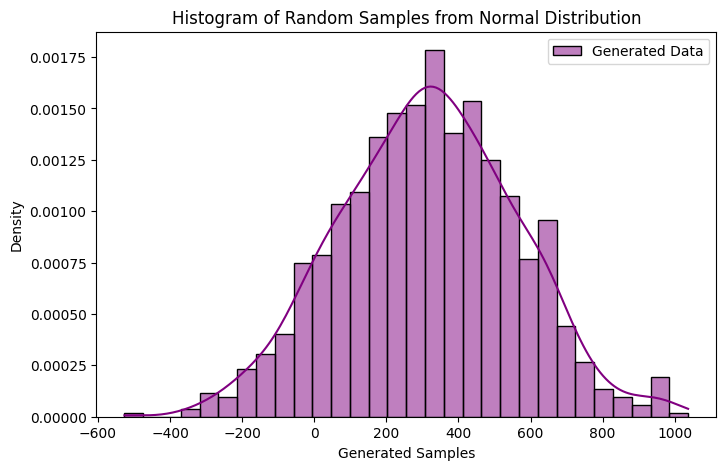

Mean: 322.966749
Standard Deviation: 245.88533510097207
Probability below Mean: 0.5
95th Percentile: 727.412134255012
Original Skewness: 0.8912303920037631
Original Kurtosis: -0.08746991289329031
Sample Skewness & Kurtosis: {10: (0.20686254931306203, -0.21236433822303136), 30: (0.0933147460680206, -0.23959249097739388), 50: (0.020557611744911965, -0.03143028935558556), 100: (0.04338747470672986, 0.17360394998138418), 200: (0.15498972154667315, -0.17586937773977462)}
99th Percentile Value: 894.981575569966


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis
# Load dataset
file_path = "/content/supermarket_sales -.csv"
df = pd.read_csv(file_path)
column = "Total"
data = df[column]
mean_val = np.mean(data)
std_dev = np.std(data, ddof=1)

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, color="blue", stat="density", label="Original Data")
plt.xlabel(column)
plt.ylabel("Density")
plt.title(f"Histogram of {column} with KDE")
plt.legend()
plt.show()
# Central Limit Theorem
sample_sizes = [10, 30, 50, 100, 200]
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes, 1):
    sample_means = [np.mean(np.random.choice(data, size=size, replace=True)) for _ in range(1000)]
    plt.subplot(3, 2, i)
    sns.histplot(sample_means, bins=30, kde=True, color="green", stat="density", label=f"Sample Size {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.title(f"Histogram of Sample Means (n={size})")
    plt.legend()
plt.tight_layout()
plt.show()

#Probability Density Function (PDF)
x = np.linspace(min(data), max(data), 100)
pdf_values = norm.pdf(x, mean_val, std_dev)
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=False, color="gray", stat="density", label="Histogram")
plt.plot(x, pdf_values, color="red", label="Normal PDF")
plt.xlabel(column)
plt.ylabel("Density")
plt.title(f"PDF of Normal Distribution vs Histogram of {column}")
plt.legend()
plt.show()
random_samples = np.random.normal(mean_val, std_dev, 1000)
plt.figure(figsize=(8, 5))
sns.histplot(random_samples, bins=30, kde=True, color="purple", stat="density", label="Generated Data")
plt.xlabel("Generated Samples")
plt.ylabel("Density")
plt.title("Histogram of Random Samples from Normal Distribution")
plt.legend()
plt.show()
# CDF
prob_below_mean = norm.cdf(mean_val, mean_val, std_dev)
percentile_95 = norm.ppf(0.95, mean_val, std_dev)
#skewness and kurtosis
original_skewness = skew(data)
original_kurtosis = kurtosis(data)
sample_skewness_kurtosis = {}
for size in sample_sizes:
    sample_means = [np.mean(np.random.choice(data, size=size, replace=True)) for _ in range(1000)]
    sample_skewness_kurtosis[size] = (skew(sample_means), kurtosis(sample_means))
# z-score equivalent
z_99th_percentile = norm.ppf(0.99, mean_val, std_dev)
results = {
    "Mean": mean_val,
    "Standard Deviation": std_dev,
    "Probability below Mean": prob_below_mean,
    "95th Percentile": percentile_95,
    "Original Skewness": original_skewness,
    "Original Kurtosis": original_kurtosis,
    "Sample Skewness & Kurtosis": sample_skewness_kurtosis,
    "99th Percentile Value": z_99th_percentile
}
for key, value in results.items():
    print(f"{key}: {value}")